In [16]:
import pandas as pd
df = pd.read_csv("MY2019_Fuel_Consumption.csv", encoding='latin1', nrows = 1023)
df.head(6)

,Model,Make,Model.1,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,Unnamed: 9,...,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220
0,Year,NaN,NaN,NaN,(L),NaN,NaN,Type,City (L/100 km),Hwy (L/100 km),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,Acura,ILX,Compact,2.4,4.0,AM8,Z,9.9,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,Acura,MDX SH-AWD,SUV: Small,3.5,6.0,AS9,Z,12.2,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,Acura,MDX SH-AWD A-SPEC,SUV: Small,3.5,6.0,AS9,Z,12.2,9.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,Acura,MDX Hybrid AWD,SUV: Small,3.0,6.0,AM7,Z,9.1,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2019,Acura,NSX,Two-seater,3.5,6.0,AM9,Z,11.1,10.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The dataset has a lot of columns because of the format of the file, for that reason the table is unreadable, but only few of the columns are important for a linear regresion. The first row is just the information of the columns (units, etc), so It is wise to delete the first row and select the columns that are useful. Also we rename the "Fuel Consumption" columns to specify that is the consumption in the city, and the column "Unnamed: 9" is the consumption in the highway (Hwy)

In [17]:
df.rename( columns={'Unnamed: 9':'Fuel Consumption Hwy', 'Fuel Consumption':'Fuel Consumption City'}, inplace=True )

df = df[["Engine Size", "Cylinders", "Fuel Consumption City", "Fuel Consumption Hwy", "CO2 Emissions" ]]
df.drop(0, inplace = True)
print (df.dtypes)
df.head(6)

Engine Size               object
Cylinders                float64
Fuel Consumption City     object
Fuel Consumption Hwy      object
CO2 Emissions             object
dtype: object


,Engine Size,Cylinders,Fuel Consumption City,Fuel Consumption Hwy,CO2 Emissions
1,2.4,4.0,9.9,7.0,199
2,3.5,6.0,12.2,9.0,252
3,3.5,6.0,12.2,9.5,258
4,3.0,6.0,9.1,9.0,210
5,3.5,6.0,11.1,10.8,261
6,2.0,4.0,11.0,8.6,232


The type of the data frame is object, we need to change it to float.

In [18]:
df['Engine Size'] = df['Engine Size'].astype(float)
df["Fuel Consumption City"] = df["Fuel Consumption City"].astype(float)
df["Fuel Consumption Hwy"] = df["Fuel Consumption Hwy"].astype(float)
df["CO2 Emissions"] = df["CO2 Emissions"].astype(float)
print (df.dtypes)

Engine Size              float64
Cylinders                float64
Fuel Consumption City    float64
Fuel Consumption Hwy     float64
CO2 Emissions            float64
dtype: object


The CO2 Emission is what is need to be calculated, so it is important to plot each column vs Emission. With that it is easy to understand the data when it is visualized.

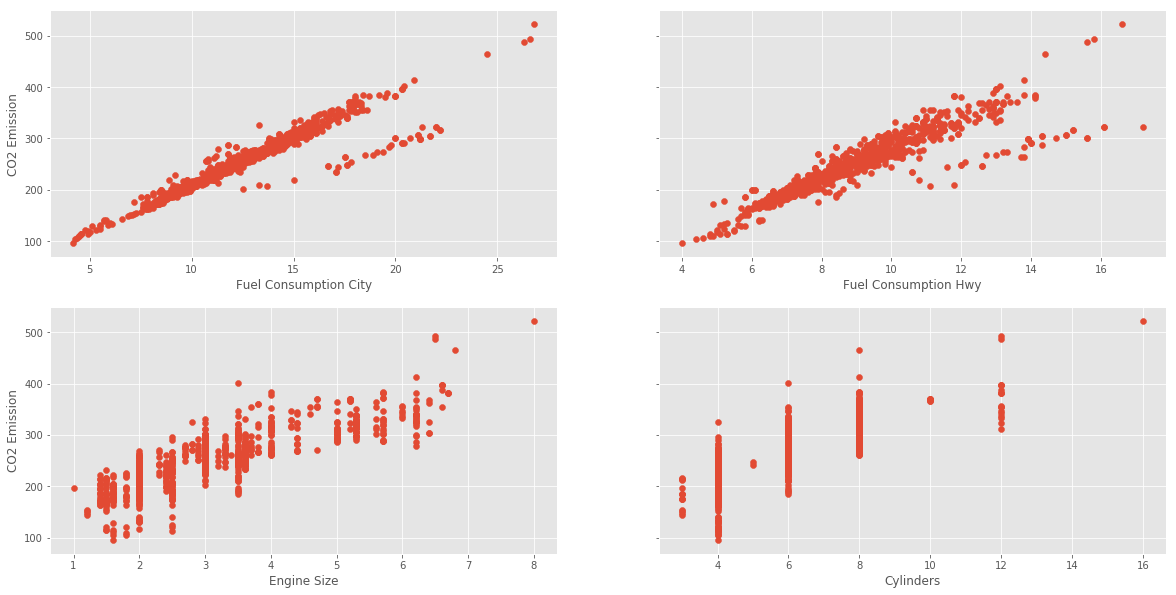

In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
mpl.style.use('ggplot')

fig, ax = plt.subplots(2, 2, figsize=(20, 10), sharey = True)

ax[0,0].set_ylabel("CO2 Emission")
ax[0,0].scatter(df["Fuel Consumption City"], df["CO2 Emissions"])
ax[0,0].set_xlabel("Fuel Consumption City")

ax[0,1].scatter(df["Fuel Consumption Hwy"], df["CO2 Emissions"])
ax[0,1].set_xlabel("Fuel Consumption Hwy")

ax[1,0].set_ylabel("CO2 Emission")
ax[1,0].scatter(df["Engine Size"], df["CO2 Emissions"])
ax[1,0].set_xlabel("Engine Size")

ax[1,1].scatter(df["Cylinders"], df["CO2 Emissions"])
ax[1,1].set_xlabel("Cylinders")
plt.savefig('images/visualData.png', dpi=400, bbox_inches="tight")

The data has a lineal tendency. So we can confirm that we can use a lineal regression to predict the CO2 emission. For the model, we are going to select 80% of the data for training and 20% for testing.

In [20]:
# np.random.rand(dimension) returns an array of random numbers between [0,1)
# Then we check every random value with a condition.
# ~mask is the negation of the condition
mask = np.random.rand(len(df)) < 0.8
train = df[mask]
test = df[~mask]

We have our data for trainining and for test. Plotting the data is a good idea.

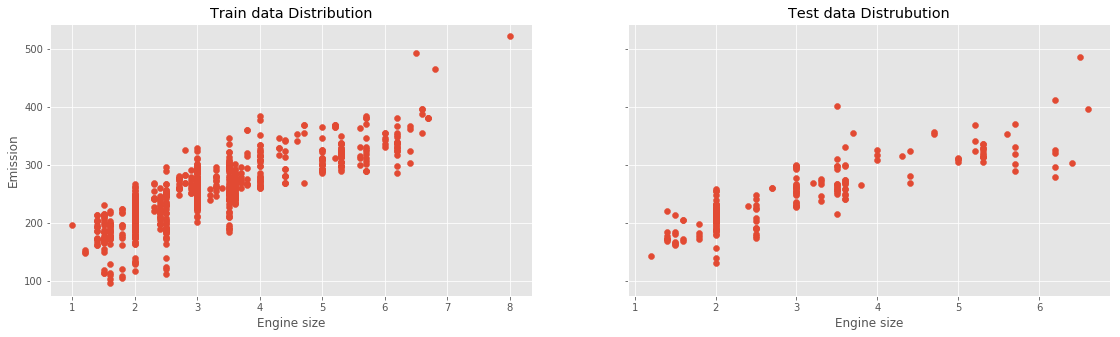

In [44]:
fig, ax = plt.subplots(1,2, figsize=(19,5), sharey = True)

ax[0].set_title("Train data Distribution")
ax[0].scatter(train["Engine Size"], train["CO2 Emissions"])
ax[0].set_xlabel("Engine size")
ax[0].set_ylabel("Emission")


ax[1].set_title("Test data Distrubution")
ax[1].scatter(test["Engine Size"], test["CO2 Emissions"])
ax[1].set_xlabel("Engine size")
plt.savefig('images/modelData.png', dpi=400, bbox_inches="tight")
plt.show()

Because of the behaviour the data, we plot a lineal model with the form $\hat{y}=\theta_0+\theta_1x$. Is the line equation, where $\theta_0$ is the intersection with the "Emission"-axis and $\theta_1$ is the slope. $x$ is the "Engine size".

In [45]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

# np.asanyarray convert the input in an n-array
train_x = np.asanyarray(train[['Engine Size']])
train_y = np.asanyarray(train[['CO2 Emissions']])

#Train the model
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[36.27157023]]
Intercept:  [137.94132173]


Now we can plot the data with the regression line.

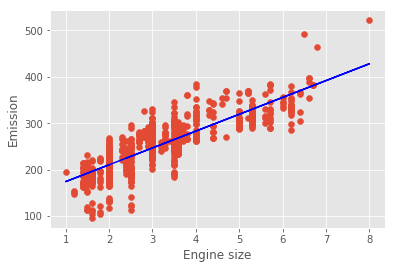

In [46]:
#Plot the training data with the regression line
plt.scatter(train['Engine Size'], train['CO2 Emissions'])
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-b')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.savefig("images/linearRegression.png")

In [47]:
#Testing the data to calculate its mean squared error
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Engine Size']])
test_y = np.asanyarray(test[['CO2 Emissions']])
y_predict = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_predict - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_predict - test_y) ** 2))
print("R2-score: %.2f" % r2_score(y_predict , test_y) )

Mean absolute error: 22.59
Residual sum of squares (MSE): 924.91
R2-score: 0.61


Now we create multi linear regression model using first only three independants variables, and after that we will compare when we used four independats variables to see which model represents the data better.

In [48]:
mult_regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Engine Size','Cylinders','Fuel Consumption City']])
y = np.asanyarray(train[['CO2 Emissions']])
mult_regr.fit(x,y)
print ('Coefficients: ', mult_regr.coef_)
print ('Intercept: ',mult_regr.intercept_)

Coefficients:  [[ 5.3727876   2.95071684 12.86188549]]
Intercept:  [58.36471333]


In [49]:
#Predict
from sklearn.metrics import mean_squared_error, r2_score  

y_predict = mult_regr.predict(test[['Engine Size','Cylinders','Fuel Consumption City']])
x_test = np.asanyarray(test[['Engine Size','Cylinders', 'Fuel Consumption City']])
y_test = np.asanyarray(test[['CO2 Emissions']])

print("Mean absolute error: %.5f" % np.sqrt(mean_squared_error(y_test, y_predict)))
print("Residual sum of squares: %.5f" % np.mean((y_predict - y_test) ** 2))
print('R2-score: %.5f' %r2_score(y_test, y_predict))

Mean absolute error: 16.88076
Residual sum of squares: 284.96014
R2-score: 0.91739


In [50]:
mult_regr_ = linear_model.LinearRegression()
x = np.asanyarray(train[['Engine Size','Cylinders','Fuel Consumption City','Fuel Consumption Hwy' ]])
y = np.asanyarray(train[['CO2 Emissions']])
mult_regr.fit(x,y)
print ('Coefficients: ', mult_regr.coef_)
print ('Intercept: ',mult_regr.intercept_)


Coefficients:  [[5.5085786  3.5291082  8.81883034 6.39380694]]
Intercept:  [46.98224437]


In [51]:
y_predict = mult_regr.predict(test[['Engine Size','Cylinders','Fuel Consumption City','Fuel Consumption Hwy' ]])
x_test = np.asanyarray(test[['Engine Size','Cylinders', 'Fuel Consumption City','Fuel Consumption Hwy' ]])
y_test = np.asanyarray(test[['CO2 Emissions']])

print("Mean absolute error: %.5f" % np.sqrt(mean_squared_error(y_test, y_predict)))
print("Residual sum of squares: %.5f" % np.mean((y_predict - y_test) ** 2))
print('R2-score: %.5f' %r2_score(y_test, y_predict))

Mean absolute error: 15.97673
Residual sum of squares: 255.25596
R2-score: 0.92600
